<a href="https://colab.research.google.com/github/Esantomi/digital-humanities/blob/main/%EC%9D%B8%EB%AC%B8%EC%A7%80%EC%8B%9D%EC%B2%98%EB%A6%AC%EC%99%80%ED%86%B5%EA%B3%84/05_%EC%9B%8C%EB%93%9C%EC%9E%84%EB%B2%A0%EB%94%A9_Word2Vec_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 전통적인 방법

In [1]:
#@title N-Gram 
문장 = '\uC6C3\uC5B4\uB77C, \uC628 \uC138\uC0C1\uC774 \uB108\uC640 \uD568\uAED8 \uC6C3\uC744 \uAC83\uC774\uB2E4. \uC6B8\uC5B4\uB77C, \uB108 \uD63C\uC790 \uC6B8\uAC83\uC774\uB2E4.'  #@param {type: "string"}
NGram크기 = "3" #@param ["1", "2", "3", "4", "5", "6"] {allow-input: true}

from nltk import ngrams

ngrams = ngrams(문장.split(), int(NGram크기))

for grams in ngrams:
  print(grams)

('웃어라,', '온', '세상이')
('온', '세상이', '너와')
('세상이', '너와', '함께')
('너와', '함께', '웃을')
('함께', '웃을', '것이다.')
('웃을', '것이다.', '울어라,')
('것이다.', '울어라,', '너')
('울어라,', '너', '혼자')
('너', '혼자', '울것이다.')


In [2]:
#@title 한국어 형태소 분석 - konlpy
한국어문장 = '\uC11C\uC0AC\uC758 \uB17C\uB9AC\uAC00 \uC9C0\uB2CC \uBE44\uC815\uD569\uC801\uC778 \uC9C0\uC810, \uACE7 \uC11C\uC0AC\uC758 \uD45C\uBA74\uC5D0 \uC0DD\uAE34 \uADE0\uC5F4 \uC9C0\uC810 \uAC19\uC740 \uAC83\uC774 \uBB38\uD559 \uD14D\uC2A4\uD2B8\uC758 \uC99D\uC0C1\uC774\uB2E4.'  #@param {type: "string"}

!pip install konlpy
from IPython.display import clear_output
clear_output()

from konlpy.tag import Kkma
kkma = Kkma()


print("  ")
print("###문장 분리###")
print(kkma.sentences(한국어문장))

print("  ")
print("###명사 추출###")
print(kkma.nouns(한국어문장))

print("  ")
print("###형태소 분리###")
print(kkma.morphs(한국어문장))

print("  ")
print("###품사 태깅###")
print(kkma.pos(한국어문장))


  
###문장 분리###
['서사의 논리가 지닌 비정합적인 지점, 곧 서 사의 표면에 생긴 균열 지점 같은 것이 문학 텍스트의 증상이다.']
  
###명사 추출###
['서사', '논리', '비정합', '지점', '사의', '표면', '균열', '문학', '텍스트', '증상']
  
###형태소 분리###
['서사', '의', '논리', '가', '지니', 'ㄴ', '비정합', '적', '이', 'ㄴ', '지점', ',', '곧', '서', '어', '사의', '표면', '에', '생기', 'ㄴ', '균열', '지점', '같', '은', '것', '이', '문학', '텍스트', '의', '증상', '이', '다', '.']
  
###품사 태깅###
[('서사', 'NNG'), ('의', 'JKG'), ('논리', 'NNG'), ('가', 'JKS'), ('지니', 'VV'), ('ㄴ', 'ETD'), ('비정합', 'NNG'), ('적', 'XSN'), ('이', 'VCP'), ('ㄴ', 'ETD'), ('지점', 'NNG'), (',', 'SP'), ('곧', 'MAG'), ('서', 'VV'), ('어', 'ECS'), ('사의', 'NNG'), ('표면', 'NNG'), ('에', 'JKM'), ('생기', 'VV'), ('ㄴ', 'ETD'), ('균열', 'NNG'), ('지점', 'NNG'), ('같', 'VA'), ('은', 'ETD'), ('것', 'NNB'), ('이', 'JKS'), ('문학', 'NNG'), ('텍스트', 'NNG'), ('의', 'JKG'), ('증상', 'NNG'), ('이', 'VCP'), ('다', 'EFN'), ('.', 'SF')]


In [3]:
#@title 중국어 형태소 분석 - Jieba
중국어문장 = '\u6211\u7231\u4F60\u3002\u5982\u679C\u8981\u5728\u4E2A\u5206\u611F\u60C5\u4E0A\u52A0\u4E0A\u4E00\u4E2A\u671F\u9650\u7684\u8BDD\u6211\u5E0C\u671B\u662F\u6709\u4E07\u5E74\uFF01'  #@param {type: "string"}

!pip install jieba
from IPython.display import clear_output
clear_output()
# encoding=utf-8

import jieba

seg_list = jieba.cut(중국어문장)  # 默认是精确模式
print("  ")
print("###精确模式###")
print(", ".join(seg_list))

seg_list = jieba.cut_for_search(중국어문장)  # 搜索引擎模式
print("  ")
print("###搜索引擎模式###")
print(", ".join(seg_list))

import jieba.posseg as pseg
words = pseg.cut(중국어문장)
print("  ")
print("###词性标注###")
for word, flag in words:
  print('%s %s' % (word, flag))


Building prefix dict from the default dictionary ...


  
###精确模式###


Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.322 seconds.
Prefix dict has been built successfully.


我爱你, 。, 如果, 要, 在, 个, 分, 感情, 上, 加上, 一个, 期限, 的话, 我, 希望, 是, 有, 万年, ！
  
###搜索引擎模式###
我爱你, 。, 如果, 要, 在, 个, 分, 感情, 上, 加上, 一个, 期限, 的话, 我, 希望, 是, 有, 万年, ！
  
###词性标注###
我爱你 l
。 x
如果 c
要 v
在 p
个分 n
感情 n
上 f
加上 v
一个 m
期限 n
的话 u
我 r
希望 v
是 v
有 v
万年 m
！ x


In [4]:
#@title One Hot Encoding 기본 - 띄어쓰기
문장1번 = '\uB098\uB294 \uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장2번 = '\uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장3번 = '\uADF8\uB300\uB97C \uC800\uC8FC\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장4번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장5번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4'  #@param {type: "string"}
분리단위_띄어쓰기 = ' '  #@param {type: "string"}

sentences = [문장1번, 문장2번, 문장3번, 문장4번, 문장5번]

from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

print("  ")
print("###입력 내용###")
print(sentences)

mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform([x.split(분리단위_띄어쓰기) for x in sentences]),columns=mlb.classes_)
print("  ")
print("###One Hot Encoding 결과###")
df

  
###입력 내용###
['나는 그대를 사랑합니다.', '그대를 사랑합니다.', '그대를 저주합니다.', '사랑합니다.', '사랑합니다']
  
###One Hot Encoding 결과###


,그대를,나는,사랑합니다,사랑합니다.,저주합니다.
0,1,1,0,1,0
1,1,0,0,1,0
2,1,0,0,0,1
3,0,0,0,1,0
4,0,0,1,0,0


In [5]:
#@title One Hot Encoding 응용 with 형태소분석(konlpy)
문장1번 = '\uB098\uB294 \uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장2번 = '\uADF8\uB300\uB97C \uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장3번 = '\uADF8\uB300\uB97C \uC800\uC8FC\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장4번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4.'  #@param {type: "string"}
문장5번 = '\uC0AC\uB791\uD569\uB2C8\uB2E4'  #@param {type: "string"}

sentences = [문장1번, 문장2번, 문장3번, 문장4번, 문장5번]

!pip install konlpy
from IPython.display import clear_output
clear_output()

from konlpy.tag import Kkma
from konlpy.utils import pprint

kkma = Kkma()

pos = lambda d: [''.join(p) for p in kkma.morphs(d)]
msentences = [pos(result) for result in sentences]

print("  ")
print("###형태소 분리###")
pprint(msentences)

from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
mlb = MultiLabelBinarizer()
df = pd.DataFrame(mlb.fit_transform(msentences),columns=mlb.classes_)

print("  ")
print("###One Hot Encoding 결과###")
df


  
###형태소 분리###
[['나', '는', '그대', '를', '사랑', '하', 'ㅂ니다', '.'],
 ['그대', '를', '사랑', '하', 'ㅂ니다', '.'],
 ['그대', '를', '저주', '하', 'ㅂ니다', '.'],
 ['사랑', '하', 'ㅂ니다', '.'],
 ['사랑', '하', 'ㅂ니다']]
  
###One Hot Encoding 결과###


,.,ㅂ니다,그대,나,는,를,사랑,저주,하
0,1,1,1,1,1,1,1,0,1
1,1,1,1,0,0,1,1,0,1
2,1,1,1,0,0,1,0,1,1
3,1,1,0,0,0,0,1,0,1
4,0,1,0,0,0,0,1,0,1


## Word2Vec

In [6]:
#@title 데이터 불러오기- 기생충 리뷰 데이터
구글드라이브ID = '1515F_ybsrR2VwxWDv2Q0Mw_YBS6trNhR'  #@param {type: "string"}
파일저장이름 = 'rawdata.txt'  #@param {type: "string"}

import time
start = time.time() # 시작시간


# 구글 드라이브 연결을 위한 기본 세팅
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# 문서 ID로 실제 파일 불러오는 법
# 실습을 위한 기생출 영화 리뷰 데이터 
# https://drive.google.com/open?id=1515F_ybsrR2VwxWDv2Q0Mw_YBS6trNhR
rawdata_downloaded = drive.CreateFile({'id': 구글드라이브ID })
rawdata_downloaded.GetContentFile(파일저장이름)

print(파일저장이름+"을 정상적으로 가져왔습니다.")

import pandas as pd
# 파일을 DataFrame으로 전환
rawdata = pd.read_csv(파일저장이름, header=0, encoding='utf-8', engine='python')
rawtext = pd.DataFrame(rawdata['text'])
## 공백값(NAN) 제거
rawtext = rawtext.dropna(axis=0)
rawtext

rawdata.txt을 정상적으로 가져왔습니다.


,text
0,"비에 젖지 않는 고급 장난감 텐트와, 비에 젖다 못해 잠겨버리는 반지하 가구"
1,최근 본 영화중 가장 충격적이었음... 근데 보니까 15세말고 19세 걸어야될것같던데..
2,"지하철이라는 단어가 언급되는 순간, 대다수의 관객은 자신이 어디에 이입할 지를 안다."
3,전 가정부가 집 벨 누를 때 부터 이 영화는 장르가 바뀐다... 역대급 꿀잼영화
4,황금종려상 수상작을 자막 없이 볼 수 있다는 것 자체로 좋다.
...,...
9995,보고나면 계속 그 영화에 대한 생각을 줄줄이 하게되고계속 후기들을 읽게하는 그런 영...
9996,"친구랑 보고나서 누나랑 한 번더 보겠다고 약속했는데, 힘들것 같다.. 발직한 웃음이..."
9997,최우식 돌 들고 내려갈때 죽이면 좋겠다 생각했다. 나도 기생충이었나보다..
9998,봉준호는 천재다 시나리오 연출 엔딩까지 마음에듬


In [7]:
#@title 형태소 분석 - 명사만 추출

!pip install konlpy
from IPython.display import clear_output
clear_output()

import time
start_vect=time.time()

from konlpy.tag import Okt
from konlpy.utils import pprint
okt = Okt()

pos = lambda d: [''.join(p) for p in okt.nouns(d)]
texts_ko = [pos(result) for result in rawtext['text']]

print(texts_ko)
print("형태소 분석 소요 시간: %0.2f Minutes"%((time.time() - start_vect)/60))

[['비', '고급', '장난감', '텐트', '비', '반지하', '가구'], ['최근', '영화', '가장', '충격', '보', '세', '세'], ['지하철', '단어', '언급', '순간', '대다수', '관객', '자신', '어디', '이입'], ['전', '가정부', '집', '벨', '때', '부터', '이', '영화', '장르', '역대', '꿀잼', '영화'], ['황금종려상', '수상작', '자막', '볼', '수', '것', '자체'], ['반지하', '제일', '아래', '줄', '지하도'], ['뭔가', '영화', '영화', '내내', '가슴', '뭔가', '영화', '수석', '영화'], ['누군가', '냄새', '평가', '묘사', '수', '것', '또한', '권력', '냄새', '서로', '경계', '구분', '동물', '세계', '우리', '사회'], ['박서준'], ['나', '또한', '누군가', '사람', '냄새', '얼굴'], ['봉테', '일이', '간과', '것', '납골당', '눈높이', '곳', '가장', '죽음', '빈부격차'], ['등급', '정이', '청소년', '감당', '버거운', '내용'], ['막판', '기우', '바램', '계획', '계획'], ['누군가', '빗물', '장난감', '텐트', '도', '막', '수', '다른', '누군가', '똥', '정물', '계획', '수', '우리네', '사회', '구조', '냉혹', '현실', '연출', '수석'], ['갑', '끼리', '우리', '사회', '축소', '판'], ['박사', '기택', '냄새', '대해', '언급', '기우', '기정', '냄새', '대해', '언급', '기우', '기정은', '명문', '교육', '자기', '선상', '설', '수', '사람', '인식', '기택', '하등', '사람', '인식', '때문'], ['사이다', '소주', '세', '잔', '기분', '첫', '잔', '두번째', '잔', '세번', '잔'], 

In [8]:
#@title Word2Vec 학습
size_차원 =   120#@param {type: "number"}
window_탐색범위 =   20#@param {type: "number"}
min_count_최소출현횟수 =   0#@param {type: "number"}
iter_학습횟수 =   500#@param {type: "number"}
sg_CBOWorSkipGram =   1#@param {type: "number"}

start_vect=time.time()

# training 모델 훈련

from gensim.models import word2vec
wv_model_ko = word2vec.Word2Vec(texts_ko, size=size_차원, 
                                window=window_탐색범위, 
                                min_count=min_count_최소출현횟수, 
                                iter=iter_학습횟수, 
                                sg=sg_CBOWorSkipGram)
## size=차원의 숫자(올라갈수록 상세히 하지만 느림) 100
## window=주변을 보는 범위(앞뒤 5) 
## min_count=최소 출현 빈도 100
## workers=사용하는 CPU 코어 숫자
## iter = 반복횟수 10
## sg= CBOW=0 / Skip-Gram=1

#from gensim.models import FastText
#wv_model_ko = FastText(texts_ko, size=1000, window=10, min_count=0, iter=10, sg=1)


wv_model_ko.init_sims(replace=True)
wv_model_ko.save('ko_word2vec_e.model')

print("Word2Vec 훈련 소요 시간: %0.2f Minutes"%((time.time() - start_vect)/60))

Word2Vec 훈련 소요 시간: 7.03 Minutes


In [9]:
#@title Word2Vec 학습 결과


## 입력 단어 확인용
from gensim.models import word2vec
model = word2vec.Word2Vec.load('ko_word2vec_e.model')

## 총 단어 숫자
print("  ")
print("###전체 단어 숫자: "+ str(len(model.wv.vocab.keys())))

## 전체 단어 리스트
print("  ")
print("###전체 단어 목록: ")
print(list(model.wv.index2word))

  
###전체 단어 숫자: 7236
  
###전체 단어 목록: 
['영화', '생각', '사람', '이', '것', '감독', '기생충', '보고', '봉준호', '그', '기분', '왜', '현실', '가족', '나', '장면', '말', '수', '냄새', '그냥', '내', '진짜', '상', '정말', '연기', '더', '최고', '충격', '때', '점', '작품', '세', '느낌', '사회', '재미', '평점', '좀', '내용', '계획', '송강호', '돈', '배우', '보기', '집', '우리', '가난', '하나', '부자', '볼', '관람', '스토리', '반지하', '별로', '정도', '이해', '내내', '마음', '처음', '황금종려상', '거', '표현', '듯', '마지막', '뭔가', '연출', '기대', '난', '시간', '여운', '다시', '뭐', '평', '의미', '역시', '칸', '저', '등급', '이야기', '속', '끝', '안', '몰입', '임', '걸', '모두', '한국', '때문', '인간', '후', '인생', '못', '계속', '봉', '조여정', '한국영', '선', '감상', '가장', '관객', '또', '장르', '모습', '번', '함', '이유', '삶', '중간', '감', '한번', '대한', '살인', '전', '남', '모든', '개인', '소름', '꼭', '이정은', '전개', '공감', '알', '건', '예술', '결말', '절대', '자체', '가슴', '비', '가정부', '개', '이선균', '영화관', '계급', '이영화', '빈부격차', '이상', '평론가', '기생', '줄', '부분', '살', '감정', '지하', '청소년', '다른', '금', '보지', '이건', '자신', '추천', '중', '무슨', '만', '게', '순간', '천재', '제목', '애', '눈', '지금', '가지', '지하철', '세상', '무', '반전', '전혀

In [10]:
#@title Word2Vec을 통한 의미연산 01 - 개별 단어

개별단어 = ['부자']  #@param 

print(wv_model_ko.most_similar(positive=개별단어, topn=50))

[('범', 0.6299444437026978), ('탈세', 0.6218552589416504), ('발랑', 0.6212388277053833), ('영악', 0.6120615601539612), ('쫘악', 0.5249724388122559), ('변명', 0.5240412354469299), ('무관심', 0.5239260196685791), ('다림질', 0.5194565057754517), ('티피', 0.4939110279083252), ('가왜', 0.4935076832771301), ('리노', 0.4931187629699707), ('꿈틀', 0.48819684982299805), ('순진무구', 0.47860535979270935), ('환경보호', 0.4760548770427704), ('빈자', 0.4696057140827179), ('불쑥', 0.46530771255493164), ('처서', 0.45781606435775757), ('라서', 0.45424410700798035), ('지나', 0.45342782139778137), ('떄문', 0.4501110315322876), ('초청', 0.44876712560653687), ('노예', 0.44760555028915405), ('사람', 0.4454868733882904), ('소시지', 0.4453948140144348), ('재밋네', 0.4415941834449768), ('홍위병', 0.4397841691970825), ('여름밤', 0.43931010365486145), ('금정', 0.4374225437641144), ('무음', 0.43734464049339294), ('멸종', 0.43712863326072693), ('꿈속', 0.436848521232605), ('타지', 0.43659621477127075), ('막무가내', 0.43586260080337524), ('가정은', 0.43478304147720337), ('헬조선', 0.432928800582

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [11]:
#@title Word2Vec을 통한 의미연산 01 - 개별 단어

개별단어 = ['거지']  #@param 

print(wv_model_ko.most_similar(positive=개별단어, topn=50))

[('근성', 0.6074113845825195), ('발렛파킹', 0.5143975615501404), ('허우대', 0.5132761597633362), ('구걸', 0.5111626386642456), ('언변', 0.505494236946106), ('막내', 0.5052605271339417), ('소독약', 0.49649548530578613), ('해놧구', 0.4929846525192261), ('모름', 0.48719000816345215), ('상줄', 0.48293375968933105), ('사회생활', 0.4757535755634308), ('짐승', 0.47160619497299194), ('윗', 0.47146034240722656), ('연봉', 0.4637135863304138), ('무능력', 0.44927287101745605), ('칼꼽', 0.4440363049507141), ('피땀', 0.43896839022636414), ('화영', 0.4271808862686157), ('은혜', 0.42050760984420776), ('안듬', 0.4185904264450073), ('얘', 0.4181915521621704), ('특혜', 0.4096335470676422), ('원수', 0.40887776017189026), ('감염', 0.4087020754814148), ('빙자', 0.4008987843990326), ('기태', 0.39786654710769653), ('편승', 0.3953479528427124), ('탕', 0.39389568567276), ('평타', 0.3856695890426636), ('이중', 0.3856191635131836), ('도움', 0.3852127194404602), ('고액', 0.38451141119003296), ('휴가', 0.3837842047214508), ('거구', 0.381702721118927), ('이나라', 0.3815189599990845), ('에러',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [12]:
#@title Word2Vec을 통한 의미연산 01 - 개별 단어

개별단어 = ['가난']  #@param 

print(wv_model_ko.most_similar(positive=개별단어, topn=50))

[('변명', 0.5278378129005432), ('무관심', 0.5204594731330872), ('포', 0.5131198167800903), ('한자', 0.47874724864959717), ('그이', 0.4694303572177887), ('가을동화', 0.4689566493034363), ('운명', 0.4664508104324341), ('난가', 0.4606301188468933), ('거꾸로', 0.45882341265678406), ('재일', 0.4506959319114685), ('트렌드', 0.44836288690567017), ('남침', 0.4478202760219574), ('언행', 0.44771909713745117), ('시크릿가든', 0.44086921215057373), ('요리사', 0.43749096989631653), ('결투', 0.43743208050727844), ('매사', 0.4373278021812439), ('희화', 0.43164926767349243), ('용면', 0.4314855635166168), ('조화로움', 0.42712104320526123), ('곱', 0.4248959422111511), ('하든', 0.4237242341041565), ('충전', 0.4200710356235504), ('촘촘', 0.41978639364242554), ('왜인', 0.41928189992904663), ('면죄부', 0.4191703498363495), ('비트코인', 0.41845589876174927), ('기뷴', 0.4155532121658325), ('로또', 0.41538238525390625), ('전공', 0.413042813539505), ('탕해', 0.41243287920951843), ('욕안', 0.4115668535232544), ('사발면', 0.4095318913459778), ('판자집', 0.4075130820274353), ('조부모', 0.4055401384

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [13]:
#@title Word2Vec을 통한 의미연산 01 - 개별 단어

개별단어 = ['운']  #@param 

print(wv_model_ko.most_similar(positive=개별단어, topn=50))

[('섭리', 0.49338042736053467), ('화이팅', 0.4873756766319275), ('팔자', 0.4749639332294464), ('낙수', 0.4740068018436432), ('놀', 0.44430258870124817), ('부스러기', 0.42955079674720764), ('구원', 0.4229651093482971), ('구입', 0.4107213616371155), ('단독주택', 0.40793710947036743), ('하여튼', 0.4077262282371521), ('오리', 0.4015125036239624), ('찜찜', 0.393748939037323), ('대피소', 0.39171260595321655), ('희노애락', 0.39139696955680847), ('학문', 0.3861783742904663), ('지원', 0.3822242021560669), ('어스', 0.37892255187034607), ('마이너스', 0.37886843085289), ('컬리', 0.3784690499305725), ('만세', 0.37845122814178467), ('레', 0.37726807594299316), ('굴복', 0.37670689821243286), ('승화', 0.3755011260509491), ('산', 0.3748634159564972), ('뭣같군', 0.37373366951942444), ('장시간', 0.37325820326805115), ('피부', 0.3724261224269867), ('인도사람', 0.37140560150146484), ('비록', 0.37003403902053833), ('일맥상통', 0.3695739507675171), ('유니크', 0.36869752407073975), ('공부자', 0.36811360716819763), ('기껏', 0.36731767654418945), ('웠', 0.36713212728500366), ('다인', 0.36696571

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [22]:
#@title Word2Vec을 통한 의미연산 01 - 개별 단어

개별단어 = ['인생']  #@param 

print(wv_model_ko.most_similar(positive=개별단어, topn=50))

[('희로애락', 0.5351410508155823), ('채플린', 0.5237108469009399), ('근근히', 0.5076402425765991), ('퍼펙트', 0.5053495764732361), ('에드', 0.5021170377731323), ('버튼', 0.4941023290157318), ('임신부', 0.4922032058238983), ('피봄', 0.49040335416793823), ('멍하니', 0.4902452230453491), ('초음', 0.47572189569473267), ('칼날', 0.47181200981140137), ('미사일', 0.4588927924633026), ('조간신문', 0.4588227868080139), ('캡쳐', 0.45377981662750244), ('사회면', 0.4508133828639984), ('볕', 0.44977867603302), ('앞날', 0.44935470819473267), ('걸음', 0.4466821253299713), ('더렙', 0.4393865466117859), ('닥치', 0.4384920597076416), ('대낮', 0.43792062997817993), ('뒷받침', 0.43650007247924805), ('탕해', 0.4363219439983368), ('구래', 0.42740559577941895), ('콘돔', 0.4248453974723816), ('와이파이', 0.42086926102638245), ('댓', 0.4171788692474365), ('읊는', 0.41673582792282104), ('화이자', 0.41445064544677734), ('중점', 0.41441112756729126), ('재정', 0.41153836250305176), ('통신', 0.4100925326347351), ('햇던', 0.4098181426525116), ('시야', 0.40140825510025024), ('열공', 0.3980838060379

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """


In [23]:
#@title Word2Vec을 통한 의미연산 02 - 의미 더하기 빼기

긍정더하기 = ['인생', '가난']  #@param 
부정빼기 = ['운'] #@param 

print(wv_model_ko.most_similar(positive=긍정더하기, negative=부정빼기, topn=50))

[('변명', 0.39847177267074585), ('무관심', 0.3967825770378113), ('한자', 0.39597582817077637), ('채플린', 0.39127692580223083), ('재정', 0.38736382126808167), ('콘돔', 0.38361313939094543), ('더렙', 0.380302369594574), ('걸음', 0.3628510534763336), ('피봄', 0.3617933690547943), ('용면', 0.35951510071754456), ('퍼펙트', 0.3583669662475586), ('희로애락', 0.3557252883911133), ('칼날', 0.35404956340789795), ('요리사', 0.3467811346054077), ('앞날', 0.3422170877456665), ('난가', 0.34098249673843384), ('하든', 0.33757489919662476), ('너희', 0.3367254137992859), ('전치', 0.3345218896865845), ('근근히', 0.331827312707901), ('거꾸로', 0.33146125078201294), ('동기', 0.3268875479698181), ('글러먹', 0.3262149393558502), ('버튼', 0.32569384574890137), ('그이', 0.32370105385780334), ('살길', 0.3229392468929291), ('응수', 0.3197662830352783), ('시야', 0.3194994032382965), ('판다', 0.3191814720630646), ('이치', 0.31819966435432434), ('피땀', 0.31749361753463745), ('욕안', 0.31726497411727905), ('탕해', 0.3150656223297119), ('그따위', 0.31500574946403503), ('꾹꾹', 0.31449878215789

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  


In [24]:
#@title 클러스터링(그룹화)
그룹숫자 =   30#@param {type: "number"}
출력숫자 =   32#@param {type: "number"}


## 입력 단어 확인용
from gensim.models import word2vec
model = word2vec.Word2Vec.load('ko_word2vec_e.model')

from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
import time

# 단어 벡터에서 k-means를 실행하고 일부 클러스터를 찍어본다.
start = time.time() # 시작시간

# 몇개로 분리하는지는 당신의 마음! 여기서는 일단 10으로
word_vectors = model.wv.syn0 # 어휘의 feature vector
num_clusters = 그룹숫자
num_clusters = int(num_clusters)

# K means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )

# 끝난 시간에서 시작시각을 빼서 걸린 시간을 구한다.
end = time.time()
elapsed = end - start
print("K Means clustering 학습 시간: ", elapsed, "seconds.")

# 각 어휘 단어를 클러스터 번호에 매핑되게 word/Index 사전을 만든다.
idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}
#     word_centroid_map = dict(zip( model.wv.index2word, idx ))

# 클러스터의 처음 ??개를 출력
for cluster in range(0,출력숫자):
    # 클러스터 번호를 출력
    print("\nCluster {}".format(cluster))

    # 클러스터 번호와 클러스터에 있는 단어를 찍는다.
    words = []
    for i in range(0,len(list(word_centroid_map.values()))):
        if( list(word_centroid_map.values())[i] == cluster ):
            words.append(list(word_centroid_map.keys())[i])
    print(words)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).


K Means clustering 학습 시간:  8.576819896697998 seconds.

Cluster 0
['불청', '폐렴', '우한', '빨갱이', '로부터', '마스크', '소고기', '조적', '피디', '먼지', '진작', '쇼', '장려', '다재', '몬스터', '오브', '일주일', '내년', '콩', '업그레이드', '악몽', '피로', '개재', '명량', '누나', '원흉', '아부지', '삼성', '껄껄', '하이허', '커터', '잠바', '기기', '지끈', '미스테리', '줌마', '씻팔렷', '셋트', '이영', '술래잡기', '더없이', '구덩이', '못청', '리나', '진날', '똥물위', '규제', '지지리', '궁', '배뎃', '대회', '개꼴깝', '자빠졋', '소독', '식생활', '거르세', '급감', '구림', '따분함', '김혜자', '미개', '혛햐', '춀펴펴', '깜박', '센서', '싸구려', '좆국', '모델', '찍어뿟노', '보심뻘', '우비', '누적', '진보', '충족', '술수', '섬유', '유연제', '숨바', '미국인', '차단', '사재기', '단속', '명칭변경', '유증', '육체', '열자', '방지', '거도', '윾시', '저급', '히트', '코너링', '점좀', '공부자', '일베', '슈거', '코팅', '난국', '암흑', '일이구만', '근원', '댜구', '장난꾸러기', '분리수거', '나야', '옿어', '젶', '꿀맛임', '봣으', '개좇댈뻔', '보고또보고', '꿀잼빅잼', '가나다', '라마', '바사', '군함도', '개방', '횟수', '아따', '추잡', '독차지', '깨문', '카페', '양보', '윈윈', '금주', '여정', '나이스', '김동인', '감자', '현진건', '민가', '썩소', '존예', '졸귀', '사드', '리자', '엔드게임', '취함', '메이저', '넘버원', '수동', '굴종', '줄기', '수채화', '물감'

In [25]:
#@title 시각화를 위한 준비(폰트)

# your current directory 
!pwd

## 한국어:     !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
## 번자체한자: !wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSerifCJKtc-hinted.zip"

!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"

# remove files in zip file if they exist
!rm LICENSE_OFL.txt README *.otf 

# unzip downloaded files
## 한국어: !unzip NotoSansCJKkr-hinted.zip
## 번체자한자: !unzip NotoSerifCJKtc-hinted.zip

!unzip NotoSansCJKkr-hinted.zip

# move font files to 'fonts/truetype' directory
## 한국어: !mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/
## 번체자한자: !mv NotoSerifCJKtc-Medium.otf /usr/share/fonts/truetype/

!mv NotoSansCJKkr-Medium.otf /usr/share/fonts/truetype/

from IPython.display import clear_output
clear_output()

print("###폰트 준비 완료")


###폰트 준비 완료


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


전체 단어량: 7236


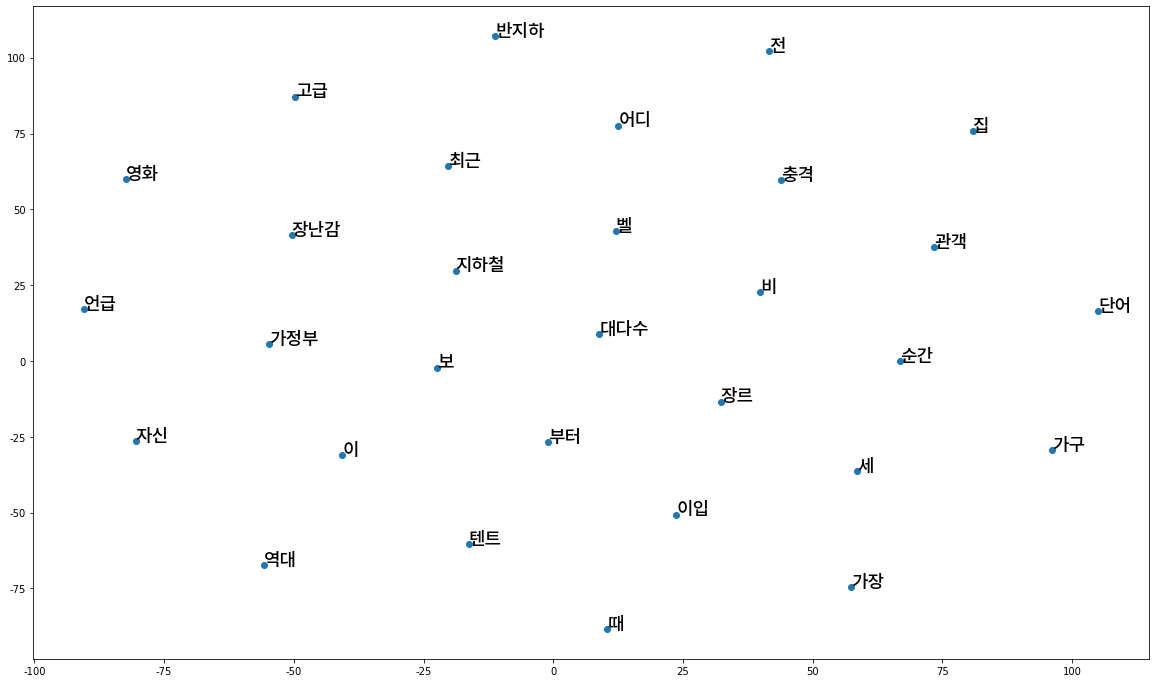

In [26]:
#@title 2차원 시각화
시각화단어량 =   30#@param {type: "number"}
출력가로크기 = 20  #@param {type: "number"}
출력세로크기 = 12 #@param {type: "number"}

from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

print("전체 단어량: "+str(len(X)))
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:시각화단어량,:])
# X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab[:시각화단어량], columns=['x', 'y'])

import matplotlib.font_manager as fm
path = '/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf'
fontprop = fm.FontProperties(fname=path, size=18)

fig = plt.figure()
fig.set_size_inches(출력가로크기, 출력세로크기)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontproperties=fontprop)
plt.show()


In [27]:
#@title 3차원 시각화 - Embedding projector https://projector.tensorflow.org/
축소차원 = 3  #@param {type: "number"}
차원정보파일이름 = 'dimension.tsv'  #@param {type: "string"}
단어정보파일이름 = 'words.tsv'  #@param {type: "string"}


from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = 'ko_word2vec_e.model'
model = g.Doc2Vec.load(model_name)

vocab = list(model.wv.vocab)
X = model[vocab]

tsne = TSNE(n_components=축소차원)

import time
start_vect=time.time()

X_tsne = tsne.fit_transform(X)
# X_tsne = tsne.fit_transform(X)

print("  ")
print("차원 축소 소요 시간: %0.2f Minutes"%((time.time() - start_vect)/60))

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y', 'z'])
df.to_csv(차원정보파일이름, sep="\t", index=False, header=None, encoding='utf-8')

dfword = pd.DataFrame(df.index)
dfword.to_csv(단어정보파일이름, sep="\t", index=False, header=None, encoding='utf-8')

print("###3차원 시각화용 데이터 준비 완료")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


  
차원 축소 소요 시간: 9.44 Minutes
###3차원 시각화용 데이터 준비 완료
